An Analysis of the titanic:
    Due to titanic incident on june 22th, made me interested in the story of titanic in 1912.

Datasets: https://hbiostat.org/data/

In [96]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic3.csv')


Stop here! Before start graphing, take a look at the data viewer to make sure the data can be graphed.

In [97]:
data.replace('?', np.nan, inplace = True)# Replacing the unknown value. 
data = data.astype({"age":np.float64, "fare":np.float64})

Graph the relationship.

<Axes: xlabel='pclass', ylabel='survived'>

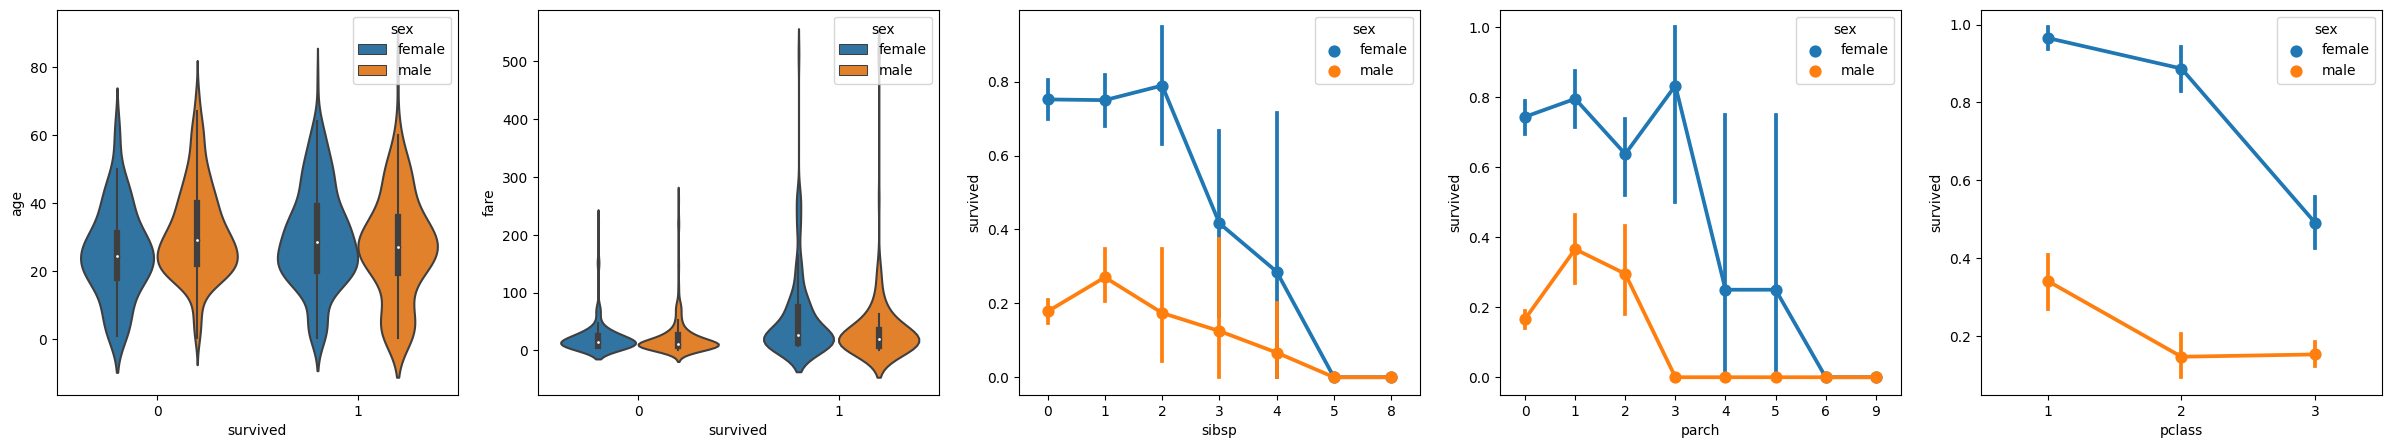

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))

sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])      # survived-age, sex
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[1])     # survived-fare, sex
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[2])     # sibsp(siblings/spouses aboard)-suvived, sex
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[3])     # pach(parent/children aboard)-survived, sex 
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[4])    # pclass(ticket class)-survived, sex

Calculate the correlation of each item to survived.

In [99]:

data.replace({'male': 1, 'female': 0}, inplace= True) # replace strings: 'male' and 'female' into float: 1 and 0.
exclude_columns = ['name','ticket','cabin','embarked','boat','body','home.dest'] # select the columns that cannot be convert to float.
correlation_data = data.drop(exclude_columns, axis=1) # use "drop()" to exclude the selected columns. # axis = 0 : rows ; axis = 1 : columns.
correlation_data.corr().abs()[["survived"]] # "corr()": calculate the correlations. ＃ "abs()" : absolute value. 


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265


In [100]:
correlation_data['relatives'] = correlation_data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
correlation_data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [101]:
data = correlation_data
data= data[['sex', 'pclass','age','relatives','fare','survived']].dropna() 
# With this information in hand, you can now drop from the dataset the low value 'sibsp' and 'parch' columns, -->
# as well as any rows hat had NaN values, to end up with a dataset that can be used for training a model.

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [104]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [105]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885
